<a href="https://colab.research.google.com/github/PadeCodigo/Funcaotransferencia/blob/main/FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letra

plant_ft =
 
      1
-------------
s^2 + 5 s + 4



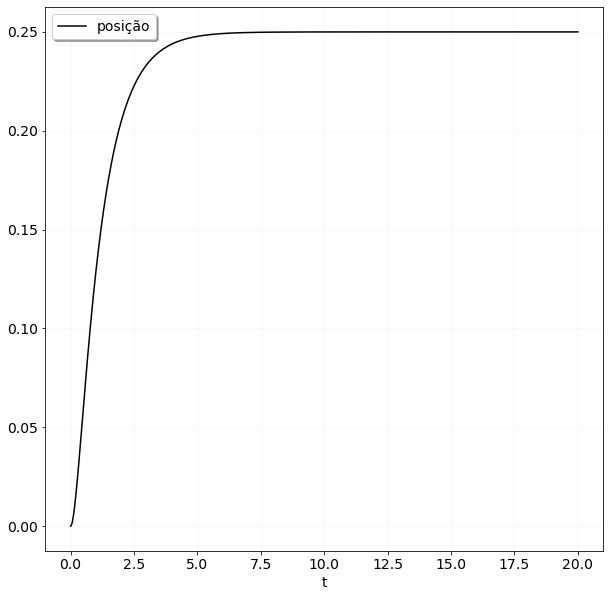

In [ ]:
# parâmetros do modelo massa-mola-amortecedor
m = 1 # massa
b = 5 # coef. amortecimento
k = 4 # coef. elasticidade


y0 = [0.0, 0.0] # condições de posição e velocidade nulas
t = np.linspace(0, 20, 1001)
u = np.ones(1001) # entrada degrau unitário - no slide 6 da Aula 04 u(t) = f(t)

# função transferência
# https://python-control.readthedocs.io/en/latest/generated/control.TransferFunction.html
plant_tf = TransferFunction(1, [m,b,k]) # (num, den)
print('plant_ft =\n', plant_tf)

# resposta forçada
xout, yout = ctl.forced_response(plant_tf, U=u, T=t) # argumentos são o modelo, o vetor entrada e o vetor tempo
plt.plot(t, yout, 'k', linewidth=1.5, label='posição')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.1)
plt.xlabel('t')
plt.show()

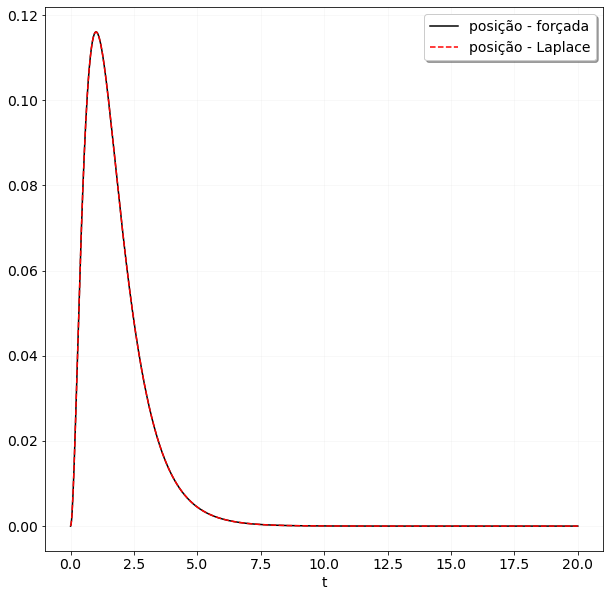

In [ ]:
# comparação entre a resposta para a entrada 2*exp(-2*t)
y0 = [0.0, 0.0]
t = np.linspace(0, 20, 1001)
u = 2*np.exp(-2*t)
# resposta calculada pela Transformada de Laplace
resposta = -1*np.exp(-2*t)+(2/3)*np.exp(-1*t)+(1/3)*np.exp(-4*t)

# resposta forçada
xout, yout = ctl.forced_response(plant_tf, U=u, T=t)
plt.plot(t, yout, 'k', linewidth=1.5, label='posição - forçada')
plt.plot(t, resposta, 'r--', linewidth=1.5, label='posição - Laplace')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.1)
plt.xlabel('t')
plt.show()

In [ ]:
polo = ctl.poles(plant_tf) # função que fornece os polos do sistema
print('Polos =', polo)

zero = ctl.zeros(plant_tf) # função que fornece os zeros do sistema
print('Zeros =', zero)

Polos = [-4.+0.j -1.+0.j]
Zeros = []
